In [11]:
!pip install kaggle

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"malakmoataz","key":"0f5cfb9dbe2e82a4e51ee74b4206e56e"}'}

In [13]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
!kaggle datasets download -d blastchar/telco-customer-churn
!mkdir churn
!unzip archive.zip -d churn

100% 172k/172k [00:00<00:00, 680kB/s]
100% 172k/172k [00:00<00:00, 679kB/s]
mkdir: cannot create directory ‘churn’: File exists
unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [15]:
!unzip telco-customer-churn.zip -d churn

Archive:  telco-customer-churn.zip
  inflating: churn/WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [16]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.utils import to_categorical

In [17]:
file_path = '/content/churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


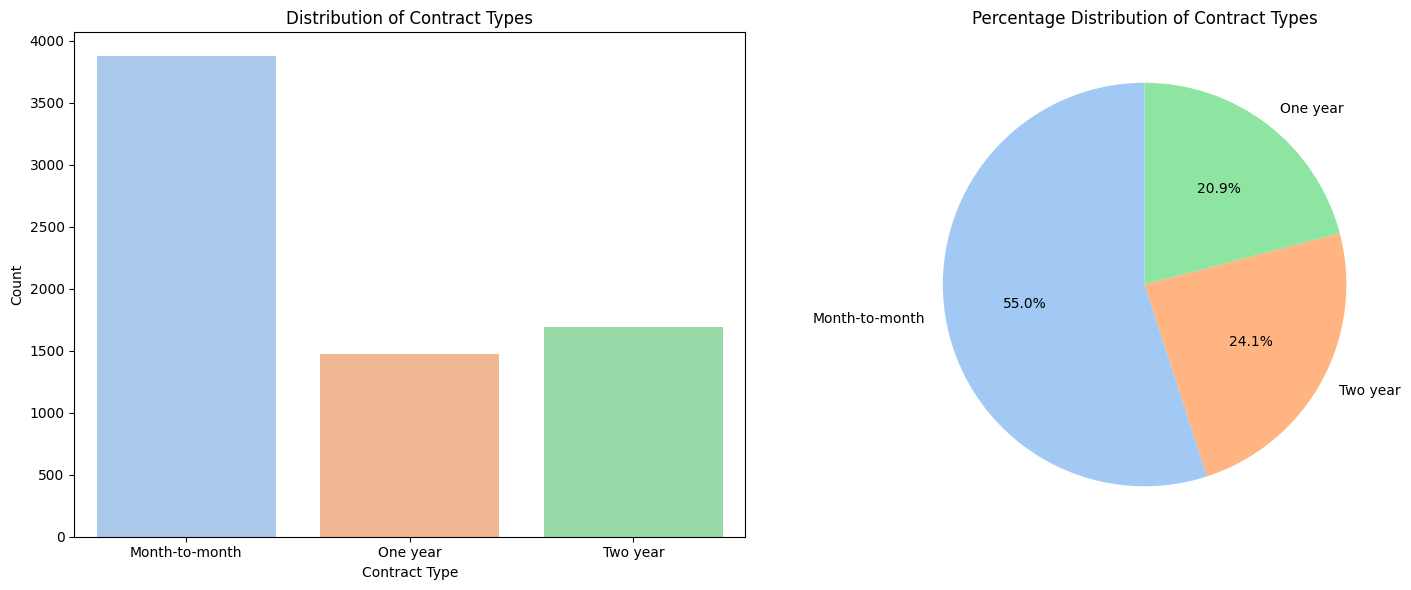

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the count plot for the 'Contract' attribute
sns.countplot(x='Contract', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Distribution of Contract Types')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Count')

# Calculate the percentage distribution
contract_distribution = df['Contract'].value_counts(normalize=True) * 100

# Plot the pie chart
axes[1].pie(contract_distribution, labels=contract_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
axes[1].set_title('Percentage Distribution of Contract Types')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


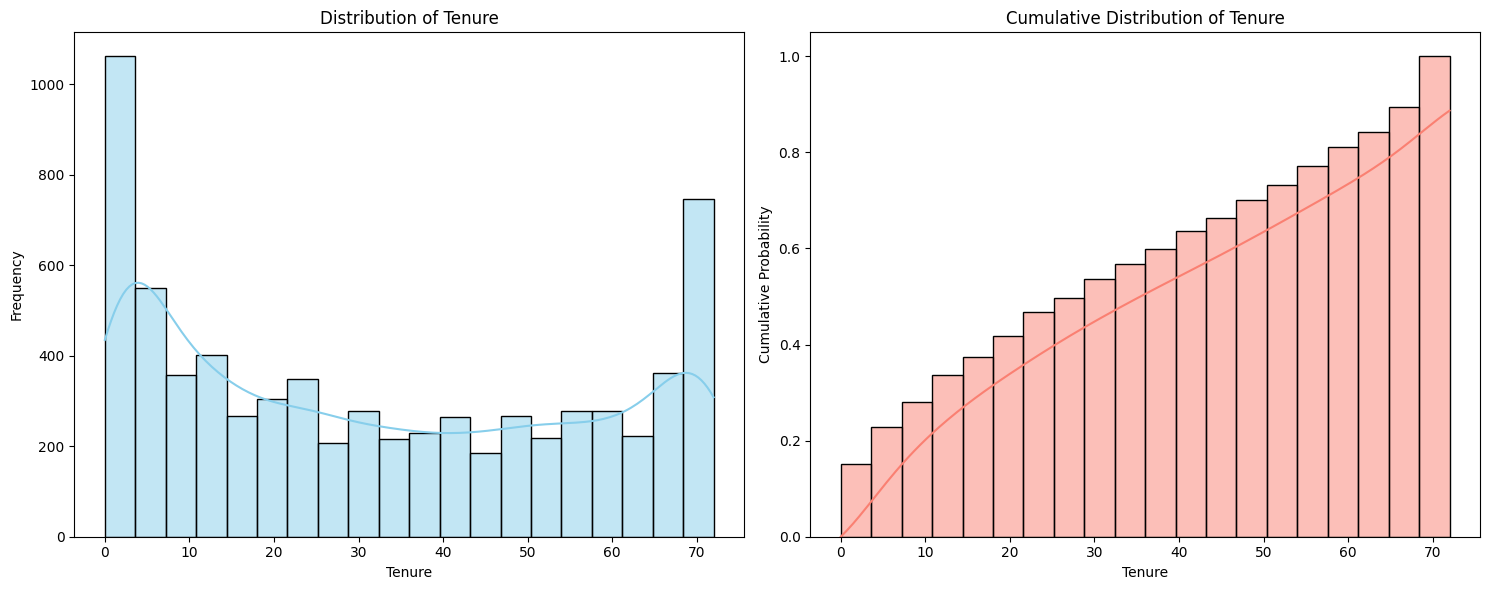

In [20]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram for 'tenure'
sns.histplot(df['tenure'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Frequency')

# Plot the cumulative histogram for 'tenure'
sns.histplot(df['tenure'], bins=20, kde=True, cumulative=True, stat='density', color='salmon', ax=axes[1])
axes[1].set_title('Cumulative Distribution of Tenure')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Cumulative Probability')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

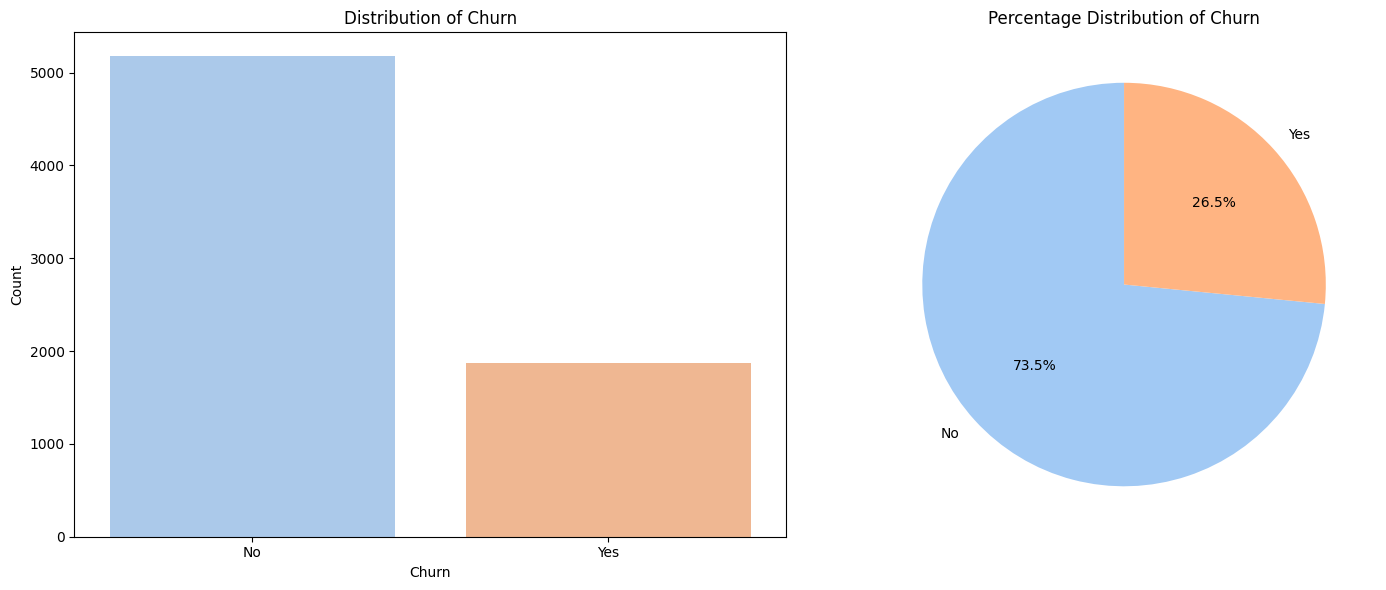

In [21]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the count plot for 'Churn'
sns.countplot(x='Churn', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Distribution of Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

# Plot the pie chart for 'Churn'
churn_distribution = df['Churn'].value_counts()
axes[1].pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
axes[1].set_title('Percentage Distribution of Churn')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

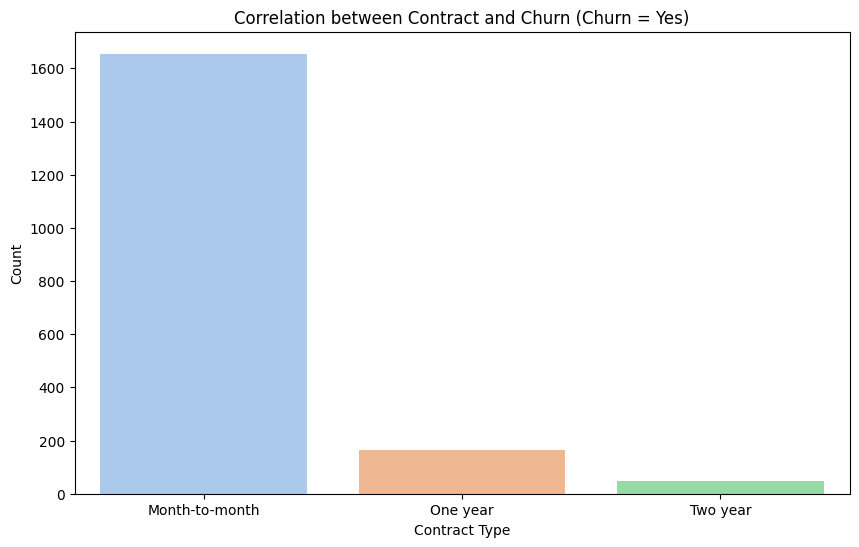

In [22]:
# Filter the dataframe for 'Churn' values of 'Yes'
df_churn_yes = df[df['Churn'] == 'Yes']

# Get the order of 'Contract' types based on the count of 'Churn' values
order = df_churn_yes['Contract'].value_counts().index

# Plot a bar chart with the specified order
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=df_churn_yes, order=order, palette='pastel')
plt.title('Correlation between Contract and Churn (Churn = Yes)')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()



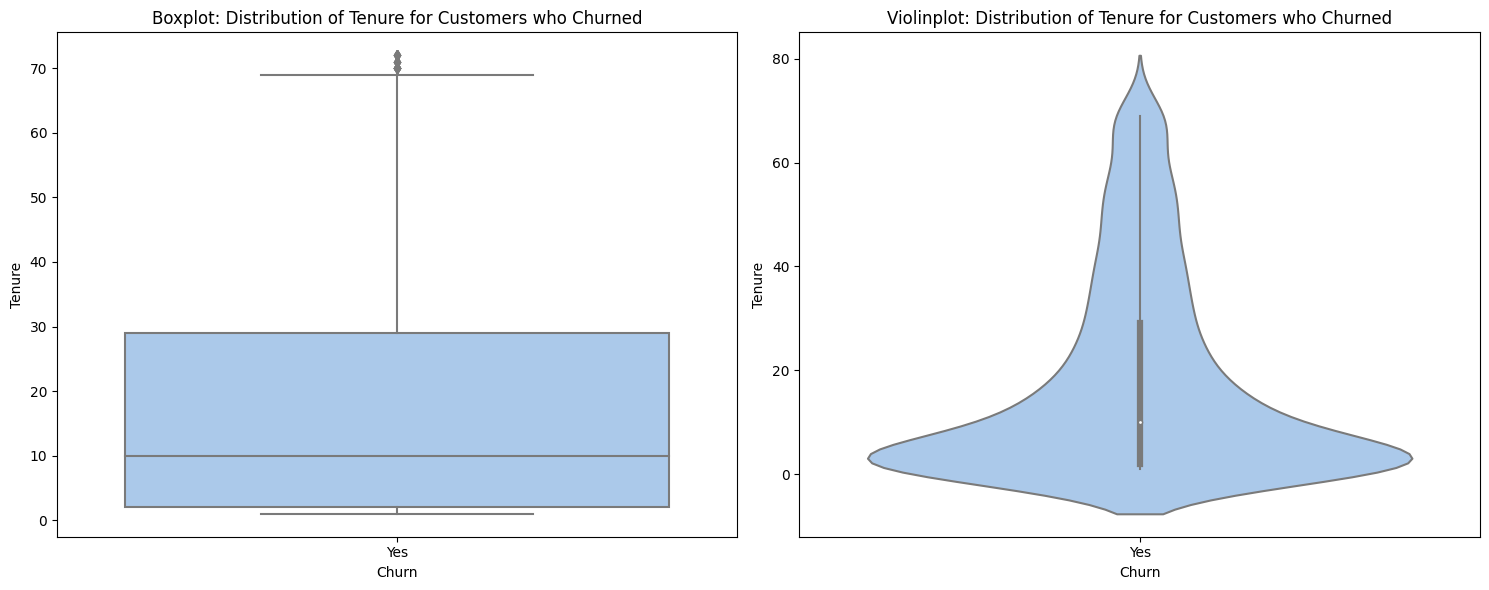

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for customers who churned ('Churn' = 'Yes')
df_churn_yes = df[df['Churn'] == 'Yes']

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the box plot
sns.boxplot(x='Churn', y='tenure', data=df_churn_yes, palette='pastel', ax=axes[0])
axes[0].set_title('Boxplot: Distribution of Tenure for Customers who Churned')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure')

# Plot the violin plot
sns.violinplot(x='Churn', y='tenure', data=df_churn_yes, palette='pastel', ax=axes[1])
axes[1].set_title('Violinplot: Distribution of Tenure for Customers who Churned')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Tenure')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [24]:
# Extract relevant columns
X = df[['tenure', 'Contract']]
y = df['Churn']

# Label encode the ordinal categorical feature 'Contract'
le = LabelEncoder()
X['Contract'] = le.fit_transform(X['Contract'])

# Convert 'Churn' to binary labels
y = y.map({'Yes': 1, 'No': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()

# Dense layers
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


<ipython-input-24-005774d3a910>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Contract'] = le.fit_transform(X['Contract'])


Epoch 1/10
141/141 [==============================] - 5s 16ms/step - loss: 0.5179 - accuracy: 0.7349 - val_loss: 0.4614 - val_accuracy: 0.7693
Epoch 2/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4962 - accuracy: 0.7373 - val_loss: 0.4530 - val_accuracy: 0.7613
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4872 - accuracy: 0.7431 - val_loss: 0.4514 - val_accuracy: 0.7693
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 0.4919 - accuracy: 0.7428 - val_loss: 0.4548 - val_accuracy: 0.7613
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4941 - accuracy: 0.7448 - val_loss: 0.4686 - val_accuracy: 0.7693
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 0.4869 - accuracy: 0.7431 - val_loss: 0.4491 - val_accuracy: 0.7693
Epoch 7/10
141/141 [==============================] - 1s 6ms/step - loss: 0.4855 - accuracy: 0.7471 - val_loss: 0.4497 - val_accuracy: 0.7666
Epoch

In [25]:
model.summary()

# Calculate and print the test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Get predictions on the test set
y_pred = model.predict(X_test)

# Assuming binary classification, convert predicted probabilities to predicted classes
y_pred_classes = (y_pred > 0.5).astype(int)

# Display some example predictions and actual labels
print('\nExample Predictions vs Actual Labels:')
for i in range(5):  # Displaying predictions for the first 5 examples
    print(f'Example {i + 1}: Predicted={y_pred_classes[i]}, Actual={y_test.iloc[i]}')

# Display a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('\nConfusion Matrix:')
print(conf_matrix)

# Display a classification report
class_report = classification_report(y_test, y_pred_classes)
print('\nClassification Report:')
print(class_report)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
45/45 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7509
Test Accuracy: 0.7509
45/45 [==============================] - 0s 3ms/step

Example Predictions vs Actual Labels:
Example 1: Predicted=[1], Actual=1
Example 2: Predicted=[0], Actual=0
Example 3: Predic